In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
home_dir = os.path.join(r'Z:/balint/numt/Michael/data/')

In [3]:
numts_array=pd.read_csv(home_dir+'numt_master_array.csv')
numts_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
#defining a function for calculating identity
def identity(g_sequence):
    seq_index=g_sequences[g_sequences==g_sequence].index[0]
    g_sequence=g_sequence.upper()
    mt_sequence=mt_sequences[seq_index].upper()
    identical_residues=0
    for res_index, g_residue in enumerate(g_sequence):
        mt_residue=mt_sequence[res_index]
        if g_residue==mt_residue:
            identical_residues+=1
    identity=(identical_residues/len(g_sequence))*100
    return identity

In [5]:
g_sequences=numts_array['g_sequence']

In [6]:
mt_sequences=numts_array['mt_sequence']

In [7]:
identities=g_sequences.apply(identity)
identities.index=g_sequences.apply(lambda seq:len(seq))
identities

g_sequence
17245    100.000000
4683      86.653854
4951      83.558877
3472      79.608295
3078      80.766732
            ...    
247       67.611336
140       80.000000
228       71.052632
326       69.938650
330       64.242424
Name: g_sequence, Length: 153, dtype: float64

Text(0.5, 0, 'Sequence length (bp)')

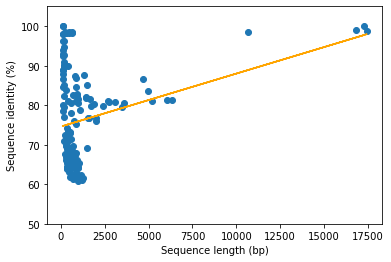

In [8]:
plt.scatter(identities.index, identities)
plt.ylim(50,105)
m, b = np.polyfit(identities.index, identities, 1)
plt.plot(identities.index, m*identities.index + b, 'orange')
plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')

In [9]:
log10_scale=pd.Series(identities.index).apply(lambda value:np.log10(value))

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


(50.0, 100.0)

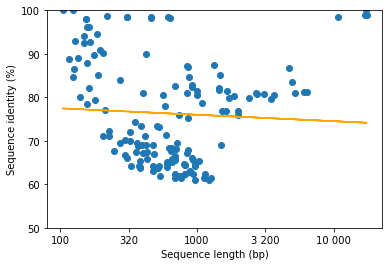

In [51]:
fig,ax=plt.subplots(1,1)
ax.scatter(log10_scale, identities)
m, b = np.polyfit(log10_scale, identities, 1)
plt.plot(log10_scale, m*log10_scale + b, 'orange')
ax.set_xticklabels(['0','100','320','1000','3 200','10 000'])
plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')
plt.ylim(50,100)